<a target="_blank" href="https://colab.research.google.com/github/thinh-vu/vnstock/blob/main/docs/5_visualization_data_exploration_vnstock3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Mục lục

1. Chứng khoán Việt Nam [tại đây](https://colab.research.google.com/github/thinh-vu/vnstock/blob/main/docs/1_vietnam_stock_vnstock3.ipynb)
2. Chứng khoán quốc tế: Forex, Crypto, Chỉ số [tại đây](https://colab.research.google.com/github/thinh-vu/vnstock/blob/main/docs/2_international_market.ipynb)
3. Dữ liệu Thị trường, hàng hoá [tại đây](https://colab.research.google.com/github/thinh-vu/vnstock/blob/main/docs/3_commodities_vnstock3.ipynb)
4. Biểu diễn dữ liệu trực quan từ Vnstock3 [tại đây](https://colab.research.google.com/github/thinh-vu/vnstock/blob/main/docs/5_visualization_data_exploration_vnstock3.ipynb)

# I. Cài đặt

## Cài đặt thư viện

In [ ]:
!pip install -U vnstock3

## Tự động chấp nhận thoả thuận người dùng

Trong trường hợp bạn sử dụng Vnstock3 trên Google Colab (hoặc các môi trường không có giao diện nhập liêụ), việc hiển thị thoả thuận người dùng mỗi lần khởi động phiên làm việc có thể khiến bạn phiền lòng, hãy đặt đoạn code này trước dòng lệnh nạp thư viện vnstock3 để tự động chấp nhận và bỏ qua bước yêu cầu chấp nhận thoả thuận sử dụng.

In [ ]:
import os
if "ACCEPT_TC" not in os.environ:
    os.environ["ACCEPT_TC"] = "tôi đồng ý"

## Nạp thư viện lần đầu

> Bạn có thể nạp toàn bộ các module của thư viện vào môi trường làm việc nếu chưa biết rõ mình cần gì hoặc chọn từng module riêng biệt để nạp vào khi đã quen thuộc.

In [4]:
## Nạp toàn bộ thư viện
# from vnstock3 import *

## Nạp Wrapper làm việc chính (UI chính của thư viện)
from vnstock3 import Vnstock

# II. Biểu diễn & khám phá dữ liệu

## Dữ liệu mẫu

In [11]:
from vnstock3 import Vnstock
stock = Vnstock().stock(symbol='VN30F1M', source='VCI')
df = stock.quote.history(start='2020-01-01', end='2024-12-31')
# Đặt cột 'time' làm cột index
df.set_index('time', inplace=True)
df

2024-06-03 00:47:14,169 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


,open,high,low,close,volume
time,,,,,
2020-01-02,877.5,886.3,876.5,886.3,70480
2020-01-03,887.1,887.9,879.5,879.5,70389
2020-01-06,877.5,883.5,871.6,872.0,83770
2020-01-07,873.9,877.8,871.6,875.0,83997
2020-01-08,868.0,871.0,863.4,863.7,90489
...,...,...,...,...,...
2024-05-27,1279.5,1281.9,1272.6,1276.2,199465
2024-05-28,1279.7,1293.4,1279.7,1292.5,209266
2024-05-29,1292.0,1292.3,1275.8,1277.5,248515


In [3]:
stock = Vnstock().stock(symbol='TCB', source='VCI')
intraday_df = stock.quote.intraday(page_size=15000)
intraday_df

2024-06-02 23:30:24,376 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


,time,price,volume,match_type,id
4628,2024-05-31 09:15:04,46800.0,46800,ATO/ATC,208526368
4627,2024-05-31 09:15:31,46800.0,3100,Buy,208527141
4626,2024-05-31 09:15:32,46750.0,800,Sell,208527177
4625,2024-05-31 09:15:38,46750.0,500,Sell,208527395
4624,2024-05-31 09:15:40,46800.0,400,Buy,208527454
...,...,...,...,...,...
5,2024-05-31 14:29:40,46850.0,500,Buy,208944238
3,2024-05-31 14:29:50,46800.0,100,Sell,208944817
2,2024-05-31 14:29:50,46800.0,100,Sell,208944818
1,2024-05-31 14:29:52,46850.0,1000,Sell,208944986


In [5]:
stock = Vnstock().stock(symbol='VCI', source='VCI')
income_df = stock.finance.income_statement(period='year', lang='vi', dropna=True)
income_df = income_df.sort_values('Năm', ascending=True)
income_df.set_index('Năm', inplace=True)
income_df

2024-06-03 00:39:03,667 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


,CP,Cổ đông thiểu số,Lãi/Lỗ ròng trước thuế,Tăng trưởng doanh thu (%),Doanh thu (Tỷ đồng),Lợi nhuận sau thuế của Cổ đông công ty mẹ (Tỷ đồng),Tăng trưởng lợi nhuận (%),Thu nhập tài chính,Chi phí tiền lãi vay,Doanh thu thuần,...,Doanh thu bán hàng và cung cấp dịch vụ,Thu nhập khác,Lợi nhuận khác,LN trước thuế,Thuế TNDN,Chi phí thuế TNDN hiện hành,Chi phí thuế TNDN hoãn lại,Lợi nhuận thuần,Cổ đông của Công ty mẹ,Lãi cơ bản trên cổ phiếu
Năm,,,,,,,,,,,,,,,,,,,,,
2013,VCI,0,90203867489,0.000000,399458747857,72169919104,0.000000,0.000000e+00,0.000000e+00,399458747857,...,399458747857,98681819,82429268,90203867489,0.000000e+00,-23010188596,4976240211,72169919104,72169919104,1812
2014,VCI,0,182828859179,0.543810,616688248624,145272769307,1.012927,0.000000e+00,0.000000e+00,616688248624,...,616688248624,-644037102,-684811399,182828859179,-3.755609e+10,-35247540841,-2308549031,145272769307,145272769307,3369
2015,VCI,1900710592,300960284712,0.136233,700701338901,237198169547,0.632778,5.025766e+09,-1.047367e+11,700701338901,...,700701338901,104529819,-288835880,300960284712,-6.186140e+10,-58822446462,-3038958111,239098880139,237198169547,4744
2016,VCI,2459060230,415888536017,0.275369,893653059787,335051546171,0.412538,5.398922e+09,-1.327008e+11,893653059787,...,893653059787,299775092,6680537,415888536017,-7.837793e+10,-79615329710,1237400094,337510606401,335051546171,3854
2017,VCI,0,802977679615,0.719618,1536741663856,655096164914,0.955210,6.271435e+09,-1.791610e+11,1536741663856,...,1536741663856,11119139864,11061826696,802977679615,-1.478815e+11,-128693085155,-19188429546,655096164914,655096164914,5790
2018,VCI,0,1011455908924,0.185287,1821479495575,834621627351,0.274044,8.024256e+09,-2.505027e+11,1821479495575,...,1821479495575,8554303031,8384183106,1023455908924,-1.888343e+11,-192707433489,3873151916,834621627351,834621627351,5067
2019,VCI,0,855007109256,-0.154015,1540944352650,693180577268,-0.169467,9.926627e+09,-1.652776e+11,1540944352650,...,1540944352650,17597948,17597948,855007109256,-1.618265e+11,-155223164412,-6603367576,693180577268,693180577268,4240
2020,VCI,0,951038957081,0.122423,1729591590563,768912289421,0.109253,5.858556e+09,-1.735135e+11,1729591590563,...,1729591590563,621078878,621078878,951038957081,-1.821267e+11,-182422798514,296130854,768912289421,768912289421,4668
2021,VCI,0,1850585393088,1.143320,3707068724492,1498718375328,0.949141,2.561687e+10,-3.307768e+11,3707068724492,...,3707068724492,69316632,-267786912,1850585393088,-3.518670e+11,-309748513618,-42118504142,1498718375328,1498718375328,4502


In [5]:
company = Vnstock().stock(symbol='VCB', source='TCBS').company
shareholders_df = company.shareholders()
# replace share_own_percent in Khác row in share_holder column by 100 - sum of other rows
shareholders_df.loc[shareholders_df['share_holder'] == 'Khác', 'share_own_percent'] = 1 - shareholders_df['share_own_percent'].sum()
shareholders_df

,share_holder,share_own_percent
0,Ngân Hàng Nhà Nước Việt Nam,0.7480
1,Mizuho Bank Limited,0.1500
2,Khác,0.0725


In [6]:
profile_df = company.profile()
profile_df

,company_name,company_profile,history_dev,company_promise,business_risk,key_developments,business_strategies
0,Ngân hàng Thương mại Cổ phần Ngoại thương Việt...,Ngân hàng Thương mại Cổ phần Ngoại thương Việ...,Ngày 30/10/1962: Ngân hàng Ngoại thương Việt...,None,Rủi ro địa chính trị và nguy cơ chiến tranh ...,Dịch vụ tài khoản Dịch vụ huy động vốn (tiền...,"Ngân hàng số 1 tại Việt Nam, một trong 100 ng..."


## Biểu diễn xu hướng

### Time series (Line)

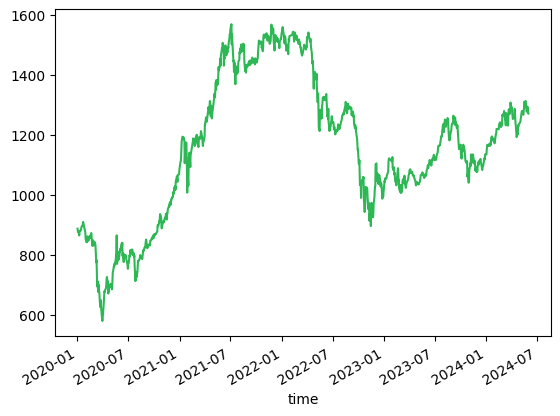

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='time'>)

In [12]:
# Vẽ biểu đồ đơn giản, sử dụng tuỳ chọn mặc định
df['close'].viz.timeseries()

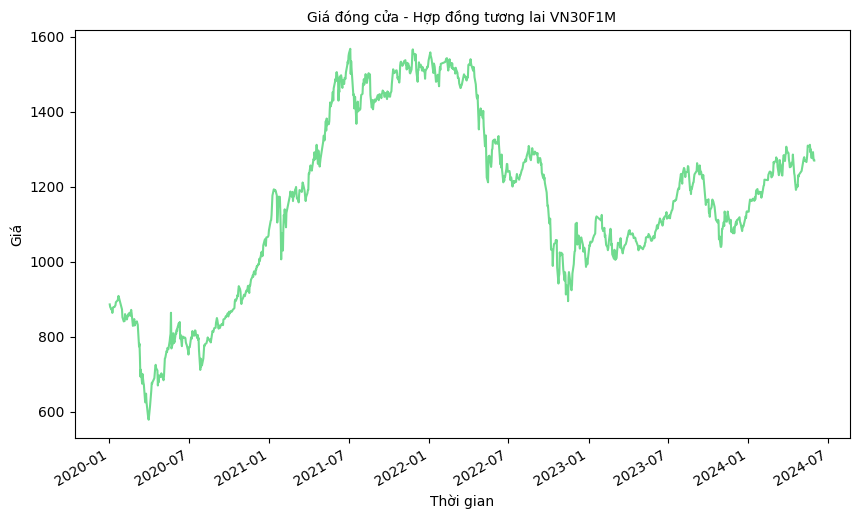

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Giá đóng cửa - Hợp đồng tương lai VN30F1M'}, xlabel='Thời gian', ylabel='Giá'>)

In [147]:
# Mở help cho biểu đồ timeseries để xem tất cả các tuỳ chọn
df['close'].viz.timeseries(figsize=(10, 6), 
                           title='Giá đóng cửa - Hợp đồng tương lai VN30F1M', 
                           ylabel='Giá', 
                           xlabel='Thời gian',
                           color_palette='vnstock',
                           palette_shuffle=True)

In [ ]:
df.viz.help('timeseries')


        Biểu diễn dữ liệu theo thời gian (timeseries). Dữ liệu cần có cột index là kiểu dữ liệu datetime.

        Tham số:
            - data (pd.DataFrame hoặc pd.Series): Dữ liệu đầu vào dạng DataFrame hoặc Series.
            - title (str): Tiêu đề của biểu đồ.
            - title_fontsize (int): Cỡ chữ cho tiêu đề.
            - xlabel (str): Nhãn cho trục X.
            - ylabel (str): Nhãn cho trục Y.
            - color_palette (str): Tên của bảng màu đã được định trước hoặc danh sách các màu tùy chỉnh. Mặc định là 'vnstock'. Các bảng màu có sẵn: 'percentage', 'amount', 'category', 'trend', 'flatui', 'vnstock', 'learn_anything'. Có thể liệt kê tất cả bảng màu với Utils.brand_palettes.keys().
            - palette_shuffle (bool): Xáo trộn thứ tự màu sắc trong bảng màu, cho phép chọn màu ngẫu nhiên trong bảng màu để biểu diễn cho đến khi bạn ưng ý. Mặc định là False.
            - grid (bool): Hiển thị lưới. Nhận True để hiện thị hoặc False để ẩn lưới.
            - data_labels 

## Combo chart

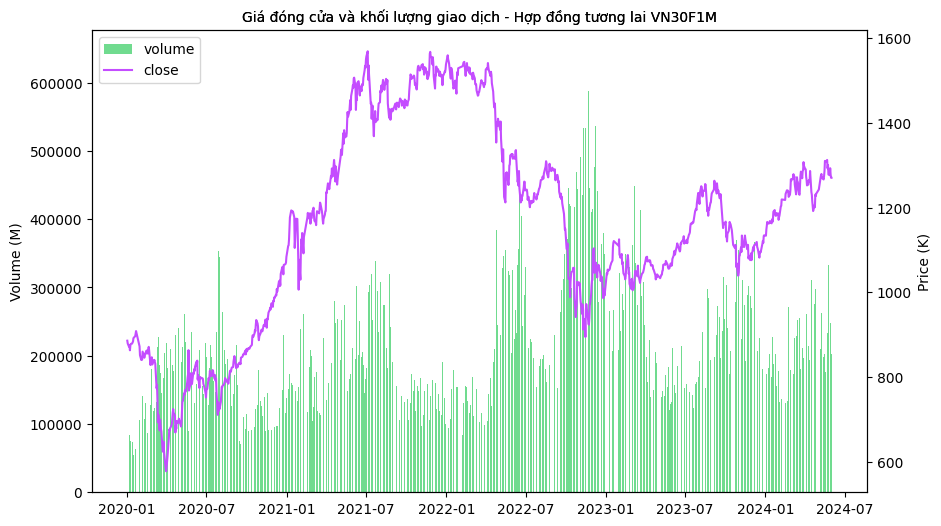

(<Figure size 1000x600 with 2 Axes>,
 <Axes: title={'center': 'Giá đóng cửa và khối lượng giao dịch - Hợp đồng tương lai VN30F1M'}, ylabel='Volume (M)'>,
 <Axes: title={'center': 'Giá đóng cửa và khối lượng giao dịch - Hợp đồng tương lai VN30F1M'}, ylabel='Price (K)'>)

In [134]:
# Mở help cho biểu đồ combo để xem tất cả các tuỳ chọn
df.viz.combo(bar_data='volume',
             line_data='close',
             title='Giá đóng cửa và khối lượng giao dịch - Hợp đồng tương lai VN30F1M',
             left_ylabel='Volume (M)', right_ylabel='Price (K)',
             figsize=(10, 6),
             color_palette='stock',
             palette_shuffle=True)

## Biểu diễn số lượng

### Table

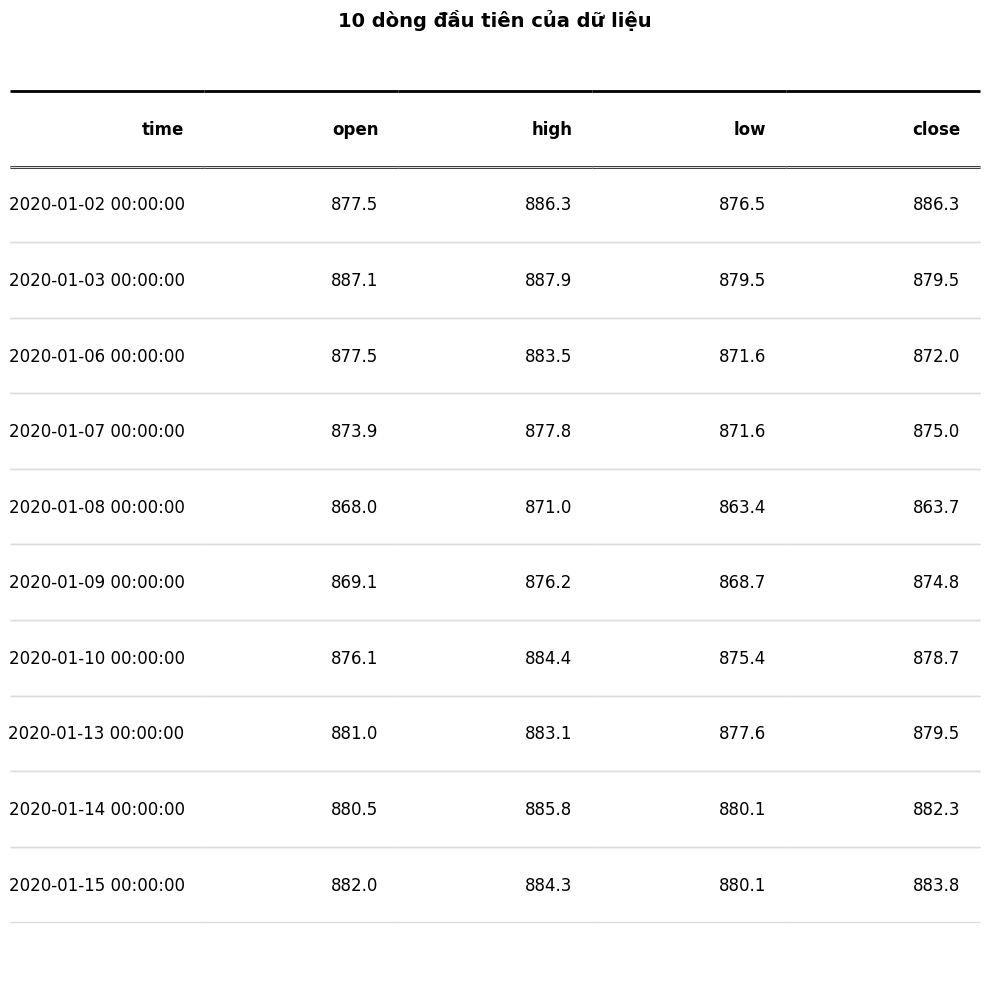

In [264]:
# Mở help cho table để xem tất cả các tuỳ chọn
df.reset_index().iloc[:10, :5]\
    .viz.table(figsize=(10, 10),
               title='10 dòng đầu tiên của dữ liệu',
               title_loc='center')

In [246]:
df.viz.help('table')


            Plot a table using matplotlib.
            Parameters:
            
            data (DataFrame): Dữ liệu cần biểu diễn
            columns (list, optional): Các cột cần hiển thị. Mặc định là None.
            title (str, optional): Tiêu đề của bảng. Mặc định là "".
            title_loc (str, optional): Tiêu đề của bảng. Mặc định là "left".
            header (bool, optional): Tùy chọn hiển thị header - hàng tiêu đề. Mặc định là True.
            colWidths (list, optional): Chiều rộng của các cột. Mặc định là None.
            rowLoc (str, optional): Vị trí hiển thị dữ liệu của các hàng. Mặc định là "right".
            colLoc (str, optional): Vị trí hiển thị dữ liệu của các cột. Mặc định là "right".
            colLabels (list, optional): Tiêu đề của các cột. Mặc định là None.
            edges (str, optional): Cạnh của bảng. Mặc định là "horizontal".
            orient (str, optional): Hướng của bảng. Mặc định là "horizontal".
            figsize (tuple, optional): Kích

### Barplot

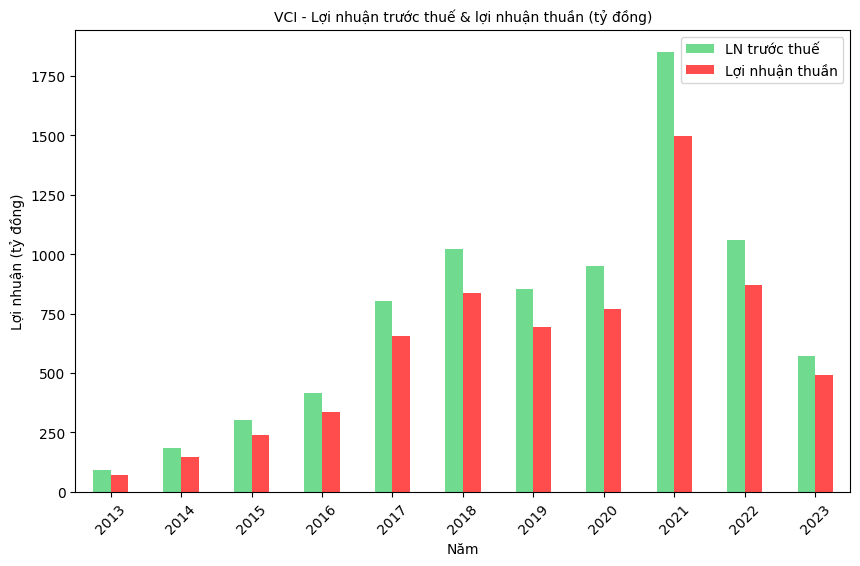

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'VCI - Lợi nhuận trước thuế & lợi nhuận thuần (tỷ đồng)'}, xlabel='Năm', ylabel='Lợi nhuận (tỷ đồng)'>)

In [9]:
# Mở help cho biểu đồ bar để xem tất cả các tuỳ chọn
income_df[['LN trước thuế', 'Lợi nhuận thuần']].div(1000_000_000)\
    .viz.bar(figsize=(10, 6), 
             title='VCI - Lợi nhuận trước thuế & lợi nhuận thuần (tỷ đồng)', 
             ylabel='Lợi nhuận (tỷ đồng)', 
             xlabel='Năm', 
             color_palette='stock',
             data_labels=False, # Hiển thị giá trị trên cột
             show_legend=True,
             rot=45) # Xoay nhãn trục x 45 độ

### Heatmap

In [128]:
df['returns'] = df['close'].pct_change() * 100

Bạn có thể sử dụng các tham số cài đặt cho Heatmap do Seaborn hỗ trợ [tại đây](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

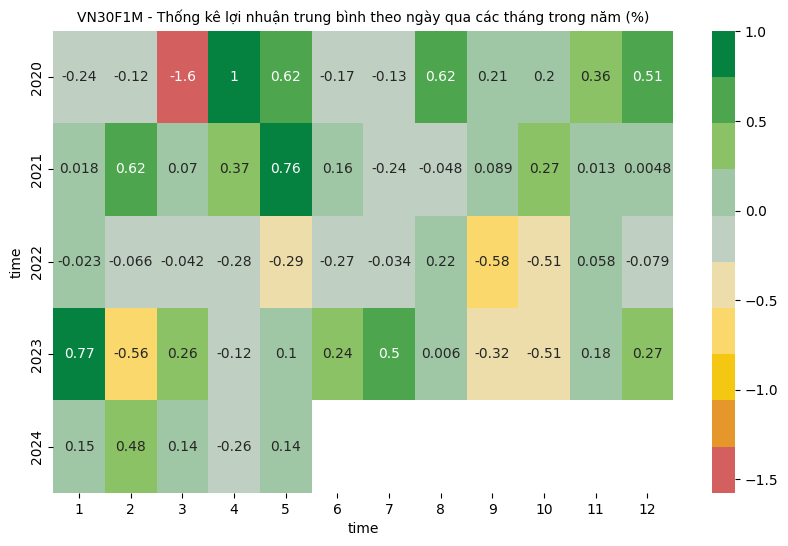

(<Figure size 1000x600 with 2 Axes>,
 <Axes: title={'center': 'VN30F1M - Thống kê lợi nhuận trung bình theo ngày qua các tháng trong năm (%)'}, xlabel='time', ylabel='time'>)

In [135]:
# Mở help cho biểu đồ heatmap để xem tất cả các tuỳ chọn
import pandas as pd
return_pivot = pd.pivot_table(df, index=df.index.year, columns=df.index.month, values='returns', aggfunc='mean')
cmap = df.viz.create_cmap('percentage') # Tạo colormap bằng 1 bảng màu có trong vnstock_ezchart
return_pivot.viz.heatmap(figsize=(10, 6),
                         title='VN30F1M - Thống kê lợi nhuận trung bình theo ngày qua các tháng trong năm (%)',
                         annot=True,
                         cmap=cmap)

In [127]:
df.viz.help('heatmap')


        Biểu diễn dữ liệu dưới dạng biểu đồ nhiệt (heatmap).

        Tham số:
            - data (pd.DataFrame): Dữ liệu đầu vào dạng DataFrame.
            - title (str): Tiêu đề của biểu đồ.
            - font_name (str): Tên của font chữ muốn áp dụng.
            - figsize (tuple): Kích thước của biểu đồ, ví dụ (10, 6).
            - xlim (tuple): Giới hạn cho trục X, ví dụ (0, 100).
            - ylim (tuple): Giới hạn cho trục Y, ví dụ (0, 100).
            - title_fontsize (int): Cỡ chữ cho tiêu đề.
            - background_color (str): Màu nền cho biểu đồ.
        


## Biểu diễn phân phối

### Histogram

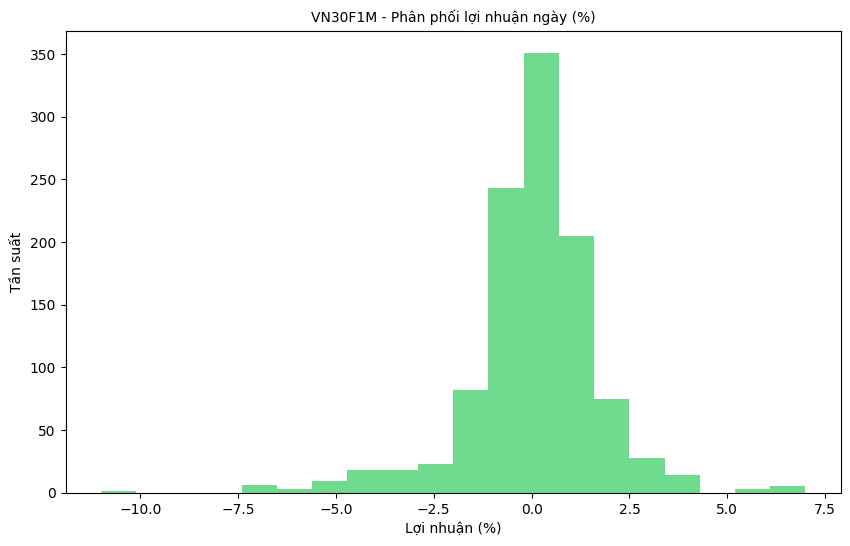

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'VN30F1M - Phân phối lợi nhuận ngày (%)'}, xlabel='Lợi nhuận (%)', ylabel='Tần suất'>)

In [167]:
# Mở help cho biểu đồ histogram để xem tất cả các tuỳ chọn
df['returns'].viz.hist(bins=20,
                       figsize=(10, 6),
                       title='VN30F1M - Phân phối lợi nhuận ngày (%)',
                       xlabel='Lợi nhuận (%)',
                       ylabel='Tần suất',
                       color_palette='stock')

### Boxplot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


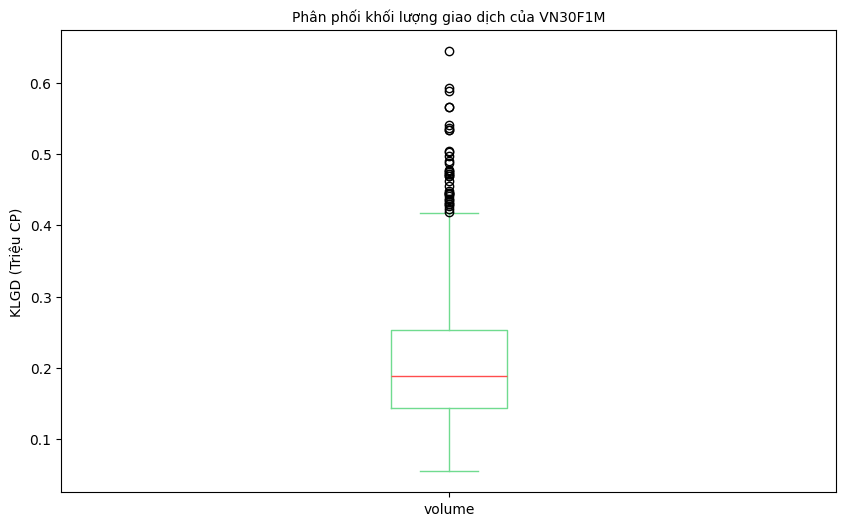

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Phân phối khối lượng giao dịch của VN30F1M'}, ylabel='KLGD (Triệu CP)'>)

In [34]:
# Mở help cho biểu đồ boxplot để xem tất cả các tuỳ chọn
df.volume.div(1000_000)\
    .viz.boxplot(
        title='Phân phối khối lượng giao dịch của VN30F1M', 
        xlabel='', 
        ylabel='KLGD (Triệu CP)', 
        color_palette='stock', 
        palette_shuffle=True,
        figsize=(10, 6))

### Wordcloud

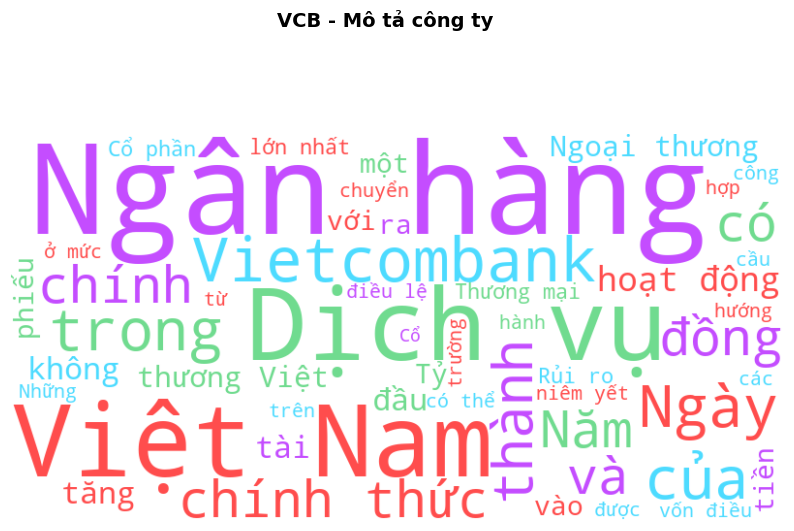

In [230]:
profile_df.viz.wordcloud(figsize=(10, 6), 
                         title='VCB - Mô tả công ty',
                         max_words=50,
                         color_palette='stock')

In [223]:
profile_df

,company_name,company_profile,history_dev,company_promise,business_risk,key_developments,business_strategies
0,Ngân hàng Thương mại Cổ phần Ngoại thương Việt...,Ngân hàng Thương mại Cổ phần Ngoại thương Việ...,Ngày 30/10/1962: Ngân hàng Ngoại thương Việt...,None,Rủi ro địa chính trị và nguy cơ chiến tranh ...,Dịch vụ tài khoản Dịch vụ huy động vốn (tiền...,"Ngân hàng số 1 tại Việt Nam, một trong 100 ng..."


## Biểu diễn tỉ lệ

### Pie chart

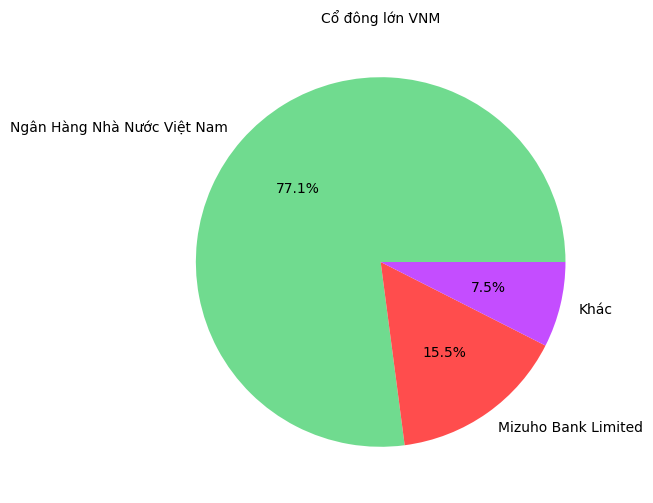

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Cổ đông lớn VNM'}>)

In [218]:
shareholders_df.viz.pie(title='Cổ đông lớn VNM',
                                             labels='share_holder',
                                             values='share_own_percent',
                                             figsize=(10, 6),
                                             ylabel='',
                                             color_palette='stock')

In [188]:
df.viz.help('pie')


        Biểu diễn dữ liệu dưới dạng biểu đồ tròn (pie chart).

        Tham số:
            - data (pd.DataFrame hoặc pd.Series): Dữ liệu đầu vào dạng DataFrame hoặc Series.
            - labels (list): Nhãn cho từng phần của biểu đồ tròn.
            - title (str): Tiêu đề của biểu đồ.
            - color_palette (str): Tên của bảng màu đã được định trước hoặc danh sách các màu tùy chỉnh. Mặc định là 'vnstock'. Các bảng màu có sẵn: 'percentage', 'amount', 'category', 'trend', 'flatui', 'vnstock', 'learn_anything'. Có thể liệt kê tất cả bảng màu với Utils.brand_palettes.keys().
            - palette_shuffle (bool): Xáo trộn thứ tự màu sắc trong bảng màu, cho phép chọn màu ngẫu nhiên trong bảng màu để biểu diễn cho đến khi bạn ưng ý. Mặc định là False.
            - legend_title (str): Tiêu đề cho chú giải.
            - series_names (list): Danh sách tên cho các dải (series) dữ liệu trong biểu đồ. Nhận giá trị là 1 danh sách (list).
            - figsize (tuple): Kích thước của biểu đ

### Treemap

(<Figure size 1000x600 with 1 Axes>, <Axes: >)

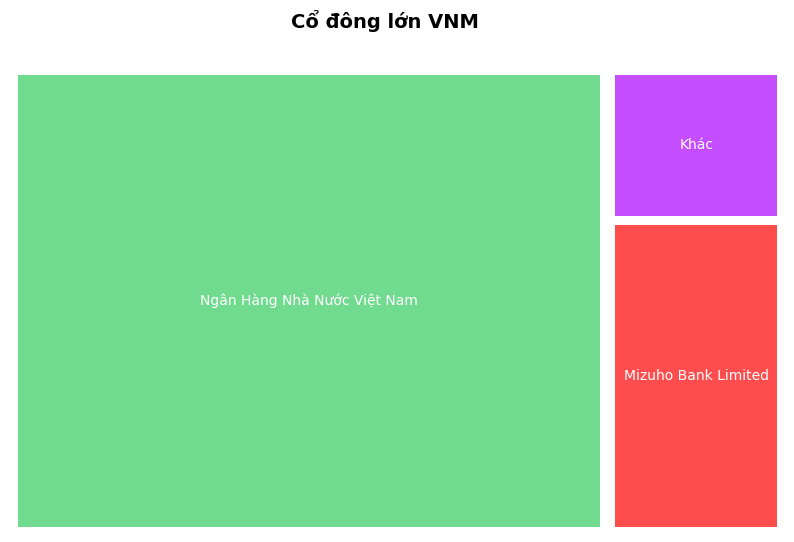

In [7]:
shareholders_df.viz.treemap(title='Cổ đông lớn VNM',
                            labels='share_holder',
                            values='share_own_percent',
                            figsize=(10, 6),
                            color_palette='stock')

In [269]:
df.viz.help('treemap')


        Vẽ biểu đồ treemap.
        Tham số:
            - values (series): Dải dữ liệu cần vẽ dạng List hoặc Pandas Series
            - labels (list): Nhãn cho từng phần của biểu đồ treemap
            - title (str): Tiêu đề của biểu đồ
            - color_palette (str): Tên của bảng màu đã được định trước hoặc danh sách các màu tùy chỉnh. Mặc định là 'vnstock'. Các bảng màu có sẵn: 'percentage', 'amount', 'category', 'trend', 'flatui', 'vnstock', 'learn_anything'. Có thể liệt kê tất cả bảng màu với Utils.brand_palettes.keys().
            - palette_shuffle (bool): Xáo trộn thứ tự màu sắc trong bảng màu, cho phép chọn màu ngẫu nhiên trong bảng màu để biểu diễn cho đến khi bạn ưng ý. Mặc định là False.
            - figsize (tuple): Kích thước của biểu đồ, ví dụ (10, 6).
            - title_fontsize (int): Cỡ chữ cho tiêu đề.
            - fontsize: Kích thước chữ bên trong biểu đồ. Mặc định là 10
            - color: Màu chữ, mặc định là 'white'.
        


## Biểu diễn tương quan

### Scatter plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


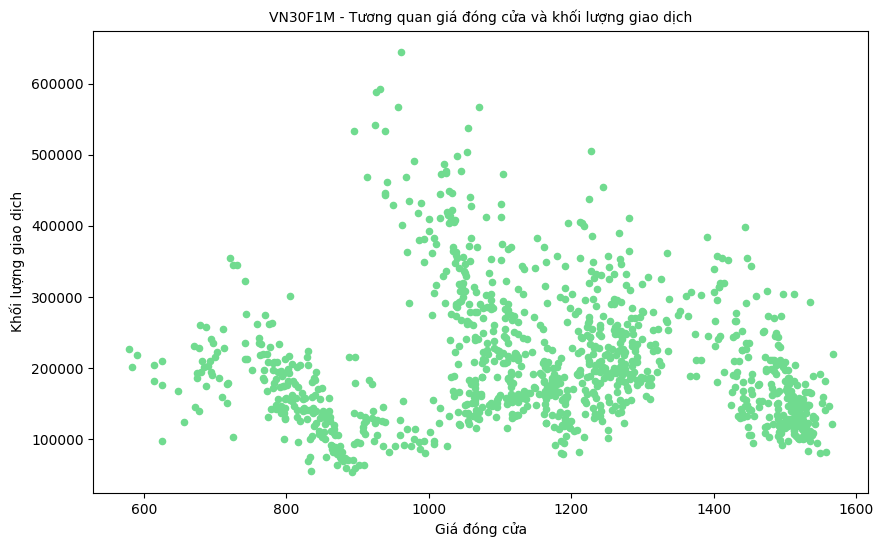

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'VN30F1M - Tương quan giá đóng cửa và khối lượng giao dịch'}, xlabel='Giá đóng cửa', ylabel='Khối lượng giao dịch'>)

In [37]:
df.viz.scatter(x='close', y='volume',
               title='VN30F1M - Tương quan giá đóng cửa và khối lượng giao dịch',
               xlabel='Giá đóng cửa',
               ylabel='Khối lượng giao dịch',
               figsize=(10, 6),
               color_palette='stock')

### Pairplot

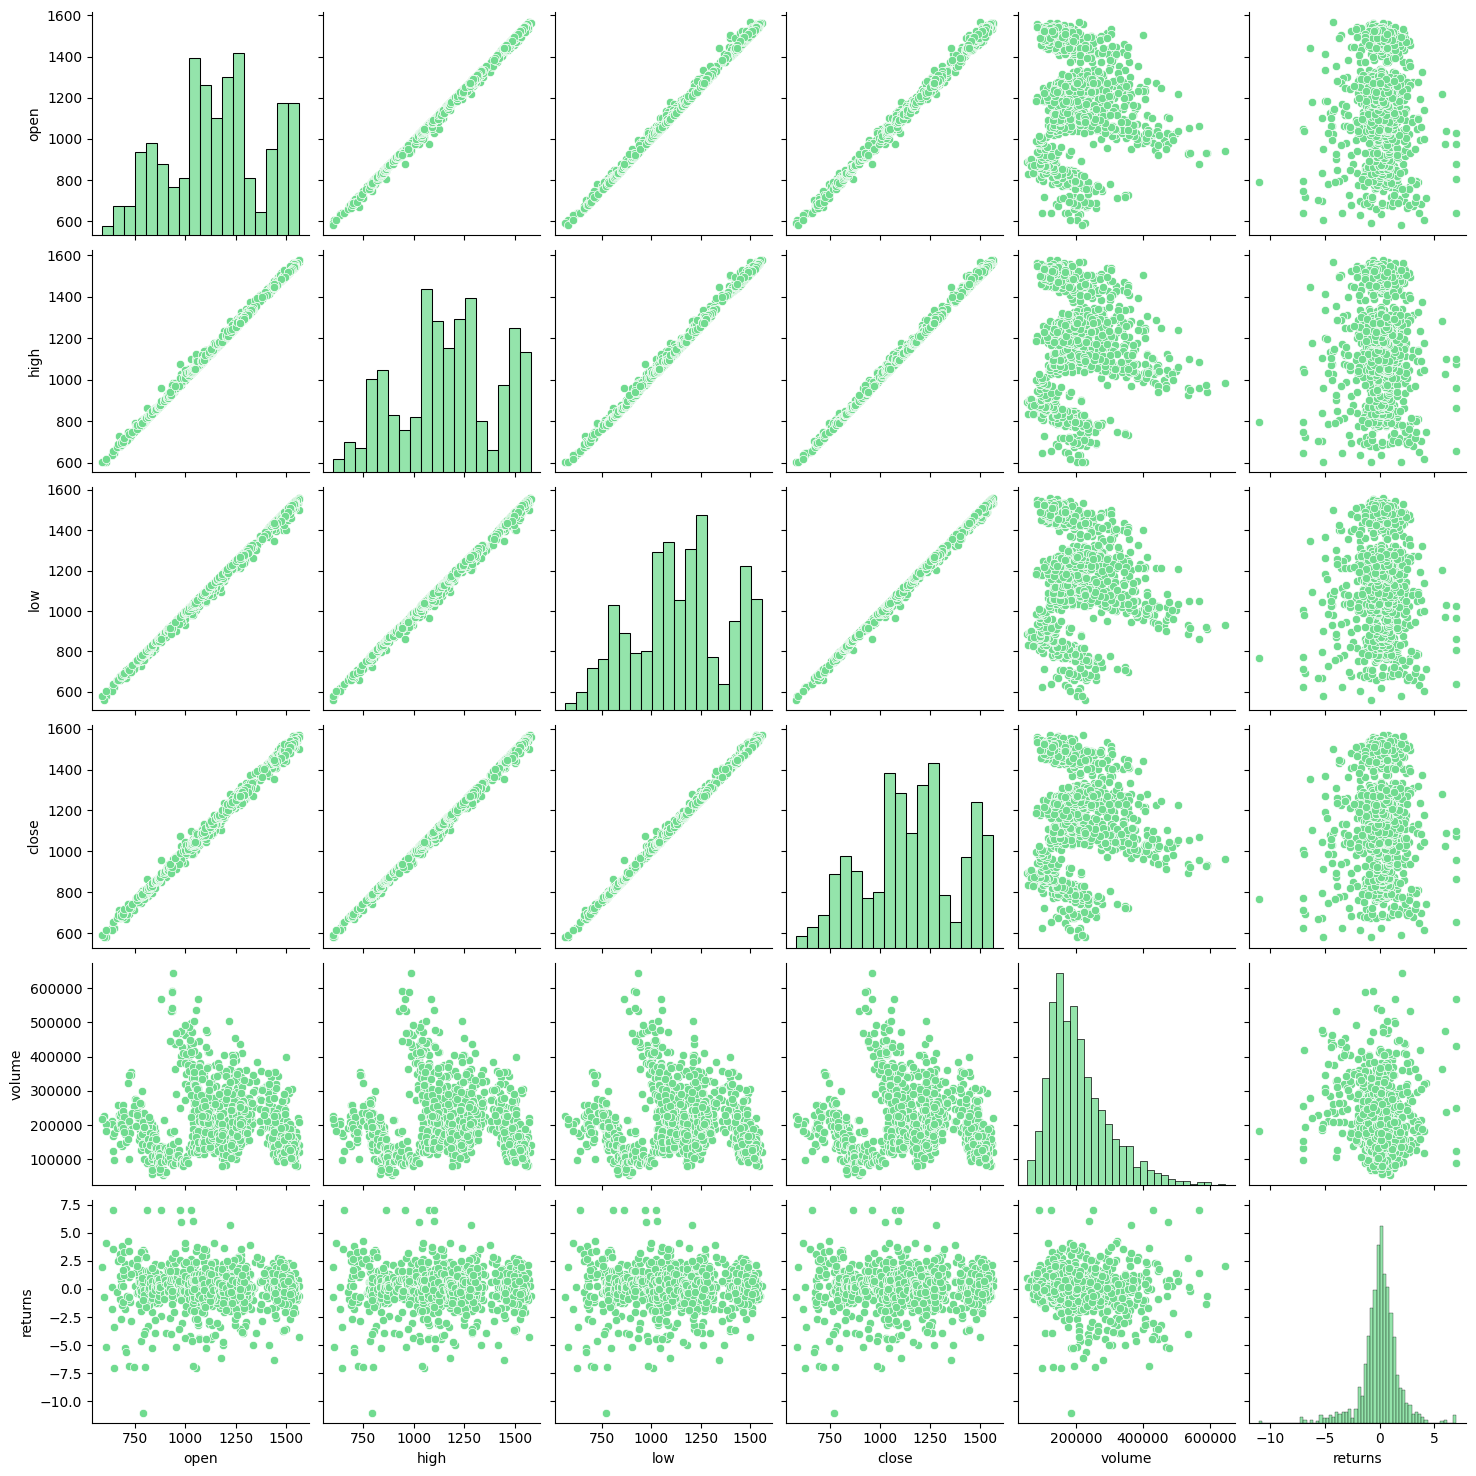

In [267]:
df.viz.pairplot()